**Author: ZHONG, Ziyu** &nbsp;&nbsp;&nbsp; **Student ID: 20923387 &nbsp;&nbsp;&nbsp; Date: 2023/03/07**

# Problem 1: SNPs of World-wide Populations

Data from:

Genotyped data of the 1043 (n) subjects. 0(AA), 1(AC), 2(CC). Missing values are removed, only autosomal SNPs were selected ($p\approx$ 400K). 

Google drive link:
https://drive.google.com/file/d/1a9I8_akfCMHBRrPMdnWkjyL9fKcQbJJq/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from sklearn import random_projection
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
df = pd.read_csv('./ceph_hgdp_minor_code_XNA.betterAnnotated.csv')
df

,snp,chr,pos,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
0,rs10000929,4,131516474,1,0,0,1,1,0,1,...,1,0,1,0,0,2,0,0,0,2
1,rs10002472,4,159087423,2,1,2,2,0,2,2,...,2,2,2,1,2,1,1,2,0,2
2,rs10005550,4,128697858,2,2,2,2,1,0,1,...,2,2,2,1,2,2,2,2,1,2
3,rs10007576,4,59063992,2,0,2,1,2,2,2,...,2,1,2,1,2,2,1,1,1,0
4,rs10007998,4,35988597,0,0,0,0,0,0,0,...,2,1,2,0,2,0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488914,rs7761056,6,169420041,2,2,2,2,2,1,1,...,0,1,0,1,2,0,1,1,1,0
488915,rs2081188,19,21180835,1,0,2,1,1,1,1,...,2,2,0,1,1,1,1,2,2,2
488916,rs2951747,12,11518610,2,2,2,2,2,1,1,...,2,2,2,2,2,2,2,2,2,2
488917,rs2929374,3,19923057,1,1,1,1,0,2,1,...,1,1,1,1,2,2,1,2,2,2


In [3]:
X = df.drop(labels=['snp','chr','pos'],axis=1)

$K = HXX^TH$

In [58]:
D = X.T.values-np.array(np.mean(X.T,axis=0))
D.shape

(1043, 488919)

In [61]:
K = D @ D.T
K.shape

(1043, 1043)

Solve and sort eigenvalues in descending order

In [64]:
lmd, V = np.linalg.eigh(K)
index_lmd = np.argsort(lmd)[::-1]
lmd[index_lmd]

array([1.17659572e+07, 8.51705848e+06, 4.62093006e+06, ...,
       1.99381253e+04, 1.04069828e+04, 1.53617428e-09])

Choose top k eigenvalues,calculate $Z_k = \Lambda^{1/2}V^T$

In [78]:
k = 2
lmd_k = lmd[index_lmd[:k]]
V_k = V[:,index_lmd[:k]]
Z_k = np.transpose(np.sqrt(lmd_k)*V_k)
Z_k

array([[ 199.67833002,  196.6712887 ,  198.57436724, ...,   54.30735491,
          60.96134823, -124.79455082],
       [-199.62894511, -197.50410876, -199.18126282, ...,  111.32576589,
         111.93931823,  -54.83317118]])

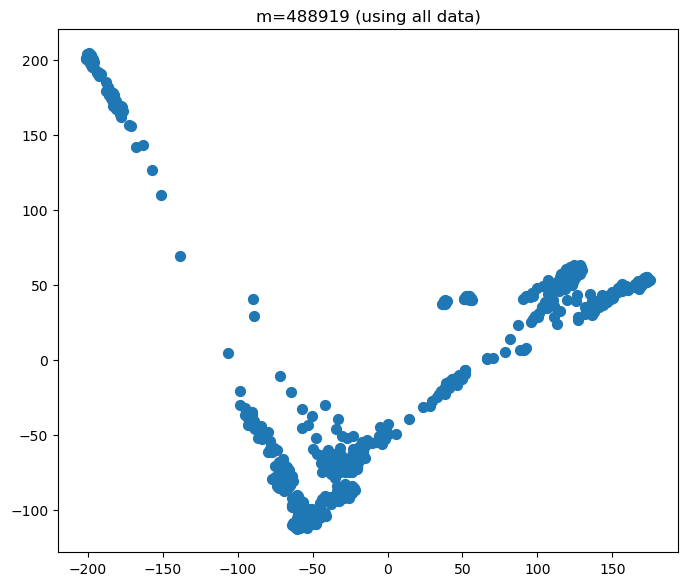

In [90]:
x = -Z_k[0] # shift to fit next one
y = -Z_k[1]
plt.figure(figsize=(8, 8), dpi=100)
ax = plt.gca()
ax.set_aspect(1)
plt.scatter(x, y, s=50, marker='o')
plt.title('m=488919 (using all data)')
plt.show()

Bernoulli random matrix with m = 100,000

In [80]:
p = X.shape[0]
m = 100000
X_random = X.iloc[np.random.choice(p,m,replace=True),:] / m
X_random

,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,HGDP00927,HGDP00461,HGDP00451,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
422900,0.00002,0.00001,0.00000,0.00001,0.00000,0.00001,0.00001,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.00001,0.00002,0.00002,0.00000,0.00002,0.00001,0.00001
397134,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,...,0.00002,0.00002,0.00002,0.00001,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002
475245,0.00002,0.00002,0.00001,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,...,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00000,0.00002,0.00001,0.00002
220016,0.00000,0.00000,0.00002,0.00002,0.00001,0.00000,0.00000,0.00000,0.00001,0.00000,...,0.00001,0.00001,0.00000,0.00000,0.00002,0.00000,0.00000,0.00000,0.00000,0.00001
410887,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00001,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228272,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,...,0.00002,0.00001,0.00002,0.00002,0.00002,0.00001,0.00002,0.00002,0.00002,0.00001
388620,0.00002,0.00000,0.00002,0.00001,0.00001,0.00000,0.00001,0.00000,0.00001,0.00001,...,0.00000,0.00001,0.00000,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00000
96806,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
149180,0.00000,0.00000,0.00001,0.00002,0.00000,0.00001,0.00002,0.00002,0.00000,0.00001,...,0.00000,0.00002,0.00002,0.00001,0.00002,0.00001,0.00001,0.00002,0.00002,0.00000


In [81]:
D_r = X_random.T.values-np.array(np.mean(X_random.T,axis=0))
K_r = D_r @ D_r.T
lmd_r, V_r = np.linalg.eigh(K_r)
index_lmd_r = np.argsort(lmd_r)[::-1]
lmd_r[index_lmd_r]

array([2.41691094e-04, 1.74712426e-04, 9.45650063e-05, ...,
       3.99651674e-07, 2.09871754e-07, 9.74570108e-22])

In [82]:
k = 2
lmd_r_k = lmd_r[index_lmd_r[:k]]
V_r_k = V_r[:,index_lmd_r[:k]]
Z_r_k = np.transpose(np.sqrt(lmd_r_k)*V_r_k)

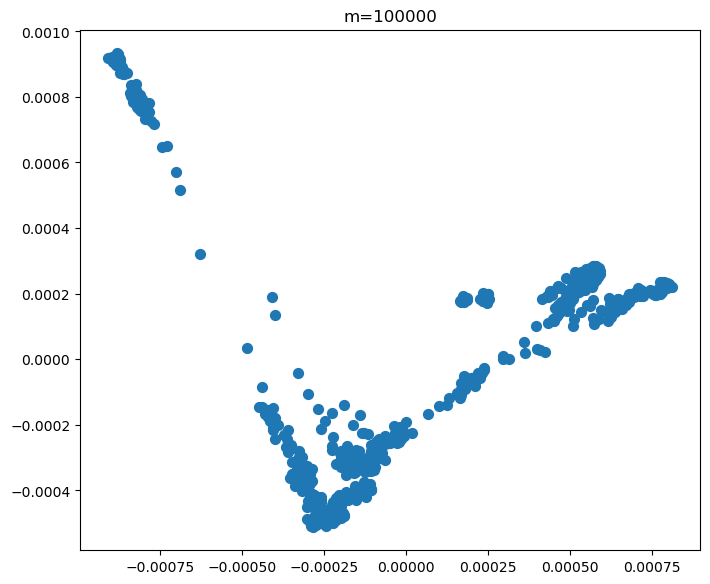

In [92]:
x = Z_r_k[0]
y = Z_r_k[1]
plt.figure(figsize=(8, 8), dpi=100)
ax = plt.gca()
ax.set_aspect(1)
plt.title('m=100000')
plt.scatter(x, y, s=50, marker='o')
plt.show()